In [1]:
import pandas as pd
from os import path

In [2]:
DATA_DIR = "../../data"

In [3]:
seeds = [2, 13, 19, 27, 38, 42, 56, 63, 6, 78]
seeds = [2, 13, 19, 27, 38, 42, 56, 63, 78]

In [18]:
split_results = {}
for seed in seeds:
    results = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/10-fold-cross-val", 
        f"training_split_{str(seed)}_filt", 
        "all.csv"
    ), sep="\t", header=None)
    results.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC", "filename"]
    split_results[seed] = results.drop("filename", axis=1)

In [19]:
split_results[2].groupby("model_name")[["F1", "MCC", "Acc", "Precision", "Recall", "AUC"]].mean()

,F1,MCC,Acc,Precision,Recall,AUC
model_name,,,,,,
SVM,0.351454,0.132071,0.602347,0.272382,0.527239,0.574525
gradient_boosting,0.308131,0.134492,0.674344,0.325337,0.376281,0.565461
kNN,0.313142,0.076461,0.599957,0.256921,0.443983,0.542692
logistic_regression,0.379874,0.159914,0.623980,0.297753,0.540127,0.592101
multilayer_perceptron,0.337997,0.175229,0.705689,0.348448,0.373797,0.584651
random_forest,0.340139,0.137448,0.658070,0.308092,0.425893,0.572186


In [20]:
df_list = [split_results[seed] for seed in seeds]
# Concatenate results for all data splits
df_concat = pd.concat(df_list)
df_concat.index = pd.MultiIndex.from_arrays(
    df_concat[['model_name', 'data', 'preprocessing']].values.T, 
    names=['model_name', 'data', 'preprocessing']
)

In [7]:
df_concat

,,,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,,,,
kNN,onehot,no_prepro,kNN,onehot,no_prepro,0.317241,0.110543,0.681672,0.302632,0.333333,0.557163
logistic_regression,onehot,no_prepro,logistic_regression,onehot,no_prepro,0.464088,0.276494,0.688103,0.375000,0.608696,0.659720
random_forest,onehot,no_prepro,random_forest,onehot,no_prepro,0.411765,0.208085,0.678457,0.346535,0.507246,0.617260
multilayer_perceptron,onehot,no_prepro,multilayer_perceptron,onehot,no_prepro,0.348624,0.234059,0.771704,0.475000,0.275362,0.594293
SVM,onehot,no_prepro,SVM,onehot,no_prepro,0.375000,0.109834,0.517685,0.263158,0.652174,0.565756
...,...,...,...,...,...,...,...,...,...,...,...
logistic_regression,onehot,undersampling,logistic_regression,onehot,undersampling,0.434343,0.269693,0.665672,0.320896,0.671875,0.668041
random_forest,onehot,undersampling,random_forest,onehot,undersampling,0.351220,0.139385,0.602985,0.255319,0.562500,0.587523
multilayer_perceptron,onehot,undersampling,multilayer_perceptron,onehot,undersampling,0.409302,0.231233,0.620896,0.291391,0.687500,0.646333


In [8]:
grouped = df_concat.groupby(level=[0,1,2])
df_means = grouped.mean()

In [9]:
# Means across the different data splits
df_means

F1       MCC       Acc  Precision  \
model_name    data   preprocessing                                            
SVM           bert   no_prepro      0.496382  0.340177  0.695546   0.379240   
                     oversampling   0.470295  0.302987  0.633040   0.339922   
                     scaling        0.511519  0.364303  0.718194   0.403967   
                     smote_os       0.502085  0.346836  0.719600   0.404299   
                     undersampling  0.461042  0.290254  0.629429   0.331585   
...                                      ...       ...       ...        ...   
random_forest seqvec no_prepro      0.442173  0.282319  0.692319   0.379467   
                     oversampling   0.380040  0.235690  0.759115   0.410800   
                     scaling        0.410795  0.265956  0.700605   0.383464   
                     smote_os       0.384633  0.226537  0.738347   0.391482   
                     undersampling  0.445080  0.261770  0.644515   0.329720   

                                      Recall       AUC  
model_name    data   preprocessing                      
SVM           bert   no_prepro      0.721077  0.704147  
                     oversampling   0.774402  0.685162  
                     scaling        0.709367  0.715176  
                     smote_os       0.671637  0.702434  
                     undersampling  0.761858  0.677732  
...                                      ...       ...  
random_forest seqvec no_prepro      0.606037  0.657910  
                     oversampling   0.362287  0.612648  
                     scaling        0.547717  0.642671  
                     smote_os       0.395522  0.612349  
                     undersampling  0.686173  0.659322  

[210 rows x 6 columns]

# Model Statistics

In [13]:
df_means.groupby("model_name")[["F1", "MCC"]].mean()

,F1,MCC
model_name,,
SVM,0.382719,0.185220
gradient_boosting,0.327913,0.186746
kNN,0.330700,0.117372
logistic_regression,0.416593,0.227793
multilayer_perceptron,0.368975,0.202747
random_forest,0.371339,0.200008


In [14]:
# Best combination for each model type
idx = df_means.groupby(['model_name'])['F1'].transform(max) == df_means['F1']
df_means[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,bert,scaling,0.511519,0.364303,0.718194,0.403967,0.709367,0.715176
gradient_boosting,bert,undersampling,0.470503,0.302599,0.661141,0.348370,0.725755,0.684335
kNN,onehot,oversampling,0.411374,0.220545,0.622605,0.300593,0.660488,0.637324
logistic_regression,seqvec,oversampling,0.524632,0.381021,0.723148,0.409048,0.733719,0.726879
multilayer_perceptron,seqvec,oversampling,0.517961,0.390468,0.776239,0.487996,0.584023,0.706698
random_forest,bert,undersampling,0.464068,0.293518,0.647406,0.339518,0.736045,0.679786


In [15]:
df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_model.csv"), sep="\t")

# Data Statistics

In [16]:
df_means.groupby("data")[["F1", "MCC"]].mean()

,F1,MCC
data,,
bert,0.450306,0.293067
integer_encoded,0.318852,0.115513
onehot,0.407094,0.249828
protparam,0.316350,0.094233
pybiomed,0.419242,0.273162
sapiens,0.214646,-0.001724
seqvec,0.438122,0.282454


In [17]:
# Best combination for each data representation
idx = df_means.groupby(['data'])['F1'].transform(max) == df_means['F1']
df_means[idx]

F1       MCC  \
model_name          data            preprocessing                       
SVM                 bert            scaling        0.511519  0.364303   
                    integer_encoded oversampling   0.372649  0.160548   
                    sapiens         undersampling  0.273463  0.008844   
gradient_boosting   protparam       undersampling  0.452366  0.275162   
logistic_regression onehot          scaling        0.469176  0.315046   
                    pybiomed        scaling        0.523874  0.380797   
                    seqvec          oversampling   0.524632  0.381021   

                                                        Acc  Precision  \
model_name          data            preprocessing                        
SVM                 bert            scaling        0.718194   0.403967   
                    integer_encoded oversampling   0.649385   0.298839   
                    sapiens         undersampling  0.497743   0.187794   
gradient_boosting   protparam       undersampling  0.662232   0.342116   
logistic_regression onehot          scaling        0.703832   0.377715   
                    pybiomed        scaling        0.742863   0.425724   
                    seqvec          oversampling   0.723148   0.409048   

                                                     Recall       AUC  
model_name          data            preprocessing                      
SVM                 bert            scaling        0.709367  0.715176  
                    integer_encoded oversampling   0.498415  0.593711  
                    sapiens         undersampling  0.514505  0.503599  
gradient_boosting   protparam       undersampling  0.673641  0.665877  
logistic_regression onehot          scaling        0.651238  0.683033  
                    pybiomed        scaling        0.684817  0.721150  
                    seqvec          oversampling   0.733719  0.726879

In [18]:
df_means[idx].to_csv(path.join(DATA_DIR, "evaluations/best_by_data.csv"))

# Preprocessing Statistics

In [19]:
df_means.groupby("preprocessing")[["F1", "MCC"]].mean()

,F1,MCC
preprocessing,,
no_prepro,0.347110,0.181718
oversampling,0.382694,0.193270
scaling,0.346381,0.184852
smote_os,0.360348,0.189617
undersampling,0.395332,0.183782


In [20]:
# Best combination for each preprocessing
idx = df_means.groupby(['preprocessing'])['F1'].transform(max) == df_means['F1']
df_means[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   pybiomed no_prepro      0.523721  0.381283  0.742201   
                               scaling        0.523874  0.380797  0.742863   
                      seqvec   oversampling   0.524632  0.381021  0.723148   
                               smote_os       0.509235  0.362058  0.748010   
multilayer_perceptron bert     undersampling  0.506173  0.358164  0.717152   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   pybiomed no_prepro       0.424028  0.688860  0.722539  
                               scaling         0.425724  0.684817  0.721150  
                      seqvec   oversampling    0.409048  0.733719  0.726879  
                               smote_os        0.440631  0.620490  0.701307  
multilayer_perceptron bert     undersampling   0.399072  0.702615  0.710914

# Best total results

In [21]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   seqvec   oversampling   0.524632  0.381021  0.723148   
                      pybiomed scaling        0.523874  0.380797  0.742863   
                               no_prepro      0.523721  0.381283  0.742201   
                               oversampling   0.523492  0.381070  0.747060   
multilayer_perceptron seqvec   oversampling   0.517961  0.390468  0.776239   
SVM                   bert     scaling        0.511519  0.364303  0.718194   
logistic_regression   seqvec   smote_os       0.509235  0.362058  0.748010   
multilayer_perceptron bert     smote_os       0.509184  0.371166  0.760005   
logistic_regression   seqvec   no_prepro      0.508671  0.359380  0.712042   
multilayer_perceptron bert     undersampling  0.506173  0.358164  0.717152   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   seqvec   oversampling    0.409048  0.733719  0.726879  
                      pybiomed scaling         0.425724  0.684817  0.721150  
                               no_prepro       0.424028  0.688860  0.722539  
                               oversampling    0.429323  0.674891  0.720236  
multilayer_perceptron seqvec   oversampling    0.487996  0.584023  0.706698  
SVM                   bert     scaling         0.403967  0.709367  0.715176  
logistic_regression   seqvec   smote_os        0.440631  0.620490  0.701307  
multilayer_perceptron bert     smote_os        0.448300  0.612631  0.705762  
logistic_regression   seqvec   no_prepro       0.394043  0.720281  0.714639  
multilayer_perceptron bert     undersampling   0.399072  0.702615  0.710914

In [22]:
df_means.nlargest(10, 'F1').to_csv(path.join(DATA_DIR, "evaluations/best_total.csv"))

In [23]:
df_means.nlargest(10, 'MCC')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
multilayer_perceptron seqvec   oversampling   0.517961  0.390468  0.776239   
logistic_regression   pybiomed no_prepro      0.523721  0.381283  0.742201   
                               oversampling   0.523492  0.381070  0.747060   
                      seqvec   oversampling   0.524632  0.381021  0.723148   
                      pybiomed scaling        0.523874  0.380797  0.742863   
multilayer_perceptron bert     no_prepro      0.497209  0.374992  0.795735   
                               scaling        0.497209  0.374992  0.795735   
                               smote_os       0.509184  0.371166  0.760005   
SVM                   bert     scaling        0.511519  0.364303  0.718194   
logistic_regression   seqvec   smote_os       0.509235  0.362058  0.748010   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
multilayer_perceptron seqvec   oversampling    0.487996  0.584023  0.706698  
logistic_regression   pybiomed no_prepro       0.424028  0.688860  0.722539  
                               oversampling    0.429323  0.674891  0.720236  
                      seqvec   oversampling    0.409048  0.733719  0.726879  
                      pybiomed scaling         0.425724  0.684817  0.721150  
multilayer_perceptron bert     no_prepro       0.514316  0.493939  0.684788  
                               scaling         0.514316  0.493939  0.684788  
                               smote_os        0.448300  0.612631  0.705762  
SVM                   bert     scaling         0.403967  0.709367  0.715176  
logistic_regression   seqvec   smote_os        0.440631  0.620490  0.701307

# Look at maxima and minima across training splits

### Maximum for models

In [18]:
grouped = df_concat.groupby(level=[0,1,2])
df_max = grouped.max().drop(["model_name", "data", "preprocessing"], axis=1)

In [19]:
idx = df_max.groupby(['model_name'])['F1'].transform(max) == df_max['F1']
df_max[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,bert,smote_os,0.661017,0.568411,0.832636,0.565217,0.795918,0.819012
gradient_boosting,pybiomed,oversampling,0.564706,0.411283,0.773050,0.470588,0.730769,0.731865
kNN,bert,smote_os,0.493976,0.352712,0.648536,0.350427,0.884615,0.718367
logistic_regression,bert,smote_os,0.636364,0.534699,0.832636,0.573770,0.779412,0.788722
multilayer_perceptron,pybiomed,oversampling,0.621359,0.518664,0.836820,0.606061,1.000000,0.768636
random_forest,protparam,no_prepro,0.590909,0.504951,0.849372,0.666667,0.653846,0.731096


### Minimum for models

In [20]:
grouped = df_concat.groupby(level=[0,1,2])
df_min = grouped.min().drop(["model_name", "data", "preprocessing"], axis=1)

In [21]:
idx = df_min.groupby(['model_name'])['F1'].transform(max) == df_min['F1']
df_min[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
SVM                   seqvec   scaling        0.450216  0.249013  0.598101   
gradient_boosting     bert     smote_os       0.431373  0.273958  0.686047   
kNN                   seqvec   undersampling  0.355932  0.089738  0.525799   
logistic_regression   seqvec   no_prepro      0.480874  0.313904  0.664557   
                               scaling        0.480874  0.324969  0.674051   
multilayer_perceptron seqvec   oversampling   0.469565  0.327062  0.696203   
random_forest         pybiomed undersampling  0.404908  0.193483  0.565111   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
SVM                   seqvec   scaling         0.322981  0.551020  0.649884  
gradient_boosting     bert     smote_os        0.319588  0.500000  0.651099  
kNN                   seqvec   undersampling   0.247059  0.571429  0.554007  
logistic_regression   seqvec   no_prepro       0.369565  0.666667  0.687456  
                               scaling         0.376068  0.591837  0.693554  
multilayer_perceptron seqvec   oversampling    0.393443  0.478261  0.686164  
random_forest         pybiomed undersampling   0.308219  0.500000  0.616144

### Maximum for data

In [22]:
idx = df_max.groupby(['data'])['F1'].transform(max) == df_max['F1']
df_max[idx]

F1       MCC  \
model_name          data            preprocessing                       
SVM                 bert            smote_os       0.661017  0.568411   
                    onehot          oversampling   0.589147  0.473594   
                    sapiens         scaling        0.390244  0.236061   
gradient_boosting   integer_encoded oversampling   0.504202  0.356373   
logistic_regression pybiomed        no_prepro      0.632768  0.522670   
                    seqvec          oversampling   0.615385  0.506697   
random_forest       protparam       no_prepro      0.590909  0.504951   

                                                        Acc  Precision  \
model_name          data            preprocessing                        
SVM                 bert            smote_os       0.832636   0.565217   
                    onehot          oversampling   0.777311   0.475000   
                    sapiens         scaling        0.687500   0.290909   
gradient_boosting   integer_encoded oversampling   0.769504   0.428571   
logistic_regression pybiomed        no_prepro      0.815900   0.536232   
                    seqvec          oversampling   0.811715   0.529412   
random_forest       protparam       no_prepro      0.849372   0.666667   

                                                     Recall       AUC  
model_name          data            preprocessing                      
SVM                 bert            smote_os       0.795918  0.819012  
                    onehot          oversampling   0.871429  0.776644  
                    sapiens         scaling        0.592593  0.649680  
gradient_boosting   integer_encoded oversampling   0.619565  0.700859  
logistic_regression pybiomed        no_prepro      0.823529  0.793340  
                    seqvec          oversampling   0.804348  0.784249  
random_forest       protparam       no_prepro      0.653846  0.731096

### Minimum for data

In [23]:
idx = df_min.groupby(['data'])['F1'].transform(max) == df_min['F1']
df_min[idx]

F1       MCC  \
model_name            data            preprocessing                       
SVM                   onehot          undersampling  0.398104  0.163803   
logistic_regression   pybiomed        oversampling   0.466258  0.291300   
                      seqvec          no_prepro      0.480874  0.313904   
                                      scaling        0.480874  0.324969   
multilayer_perceptron bert            oversampling   0.467066  0.314971   
                      sapiens         undersampling  0.206897 -0.072888   
random_forest         integer_encoded undersampling  0.341232  0.073060   
                      protparam       undersampling  0.402010  0.177123   

                                                          Acc  Precision  \
model_name            data            preprocessing                        
SVM                   onehot          undersampling  0.536946   0.283582   
logistic_regression   pybiomed        oversampling   0.708861   0.389610   
                      seqvec          no_prepro      0.664557   0.369565   
                                      scaling        0.674051   0.376068   
multilayer_perceptron bert            oversampling   0.690418   0.386139   
                      sapiens         undersampling  0.442424   0.133333   
random_forest         integer_encoded undersampling  0.533170   0.253086   
                      protparam       undersampling  0.615120   0.300885   

                                                       Recall       AUC  
model_name            data            preprocessing                      
SVM                   onehot          undersampling  0.600000  0.597959  
logistic_regression   pybiomed        oversampling   0.575758  0.664808  
                      seqvec          no_prepro      0.666667  0.687456  
                                      scaling        0.591837  0.693554  
multilayer_perceptron bert            oversampling   0.574468  0.681901  
                      sapiens         undersampling  0.454545  0.450194  
random_forest         integer_encoded undersampling  0.514286  0.543728  
                      protparam       undersampling  0.571429  0.604820

# Evaluation on TAP

In [10]:
seeds = [2, 13, 27, 38, 63, 78]

In [28]:
split_results = {}
for seed in seeds:
    results = pd.read_csv(path.join(
        DATA_DIR, 
        "evaluations/10-fold-cross-val", 
        f"training_split_{str(seed)}_filt", 
        "tap.csv"
    ), sep="\t", header=None)
    results.columns = ["model_name", "data", "preprocessing", "F1", "MCC", "Acc", "Precision", "Recall", "AUC", "filename"]
    split_results[seed] = results.drop("filename", axis=1)

In [29]:
df_list_tap = [split_results[seed] for seed in seeds]

In [12]:

# Concatenate results for all data splits
df_concat = pd.concat(df_list_tap)
df_concat["preprocessing"] = df_concat["preprocessing"].apply(lambda s: s[1:])
df_concat.index = pd.MultiIndex.from_arrays(
    df_concat[['model_name', 'data', 'preprocessing']].values.T, 
    names=['model_name', 'data', 'preprocessing']
)

In [13]:
df_concat

,,,model_name,data,preprocessing,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,,,,
kNN,integer_encoded,no_prepro,kNN,integer_encoded,no_prepro,0.394464,0.068463,0.273859,0.982759,0.246753,0.573377
logistic_regression,integer_encoded,no_prepro,logistic_regression,integer_encoded,no_prepro,0.670423,0.006046,0.514523,0.959677,0.515152,0.507576
random_forest,integer_encoded,no_prepro,random_forest,integer_encoded,no_prepro,0.647564,-0.004318,0.489627,0.957627,0.489177,0.494589
multilayer_perceptron,integer_encoded,no_prepro,multilayer_perceptron,integer_encoded,no_prepro,0.586826,-0.030540,0.427386,0.951456,0.424242,0.462121
SVM,integer_encoded,no_prepro,SVM,integer_encoded,no_prepro,0.674095,-0.070412,0.514523,0.945312,0.523810,0.411905
...,...,...,...,...,...,...,...,...,...,...,...
kNN,onehot,undersampling,kNN,onehot,undersampling,0.782609,-0.015900,0.647303,0.956250,0.662338,0.481169
logistic_regression,onehot,undersampling,logistic_regression,onehot,undersampling,0.727273,-0.045170,0.576763,0.951049,0.588745,0.444372
random_forest,onehot,undersampling,random_forest,onehot,undersampling,0.717391,0.028761,0.568465,0.963504,0.571429,0.535714


In [14]:
tap_grouped = df_concat.groupby(level=[0,1,2])
tap_means = tap_grouped.mean()

In [15]:
tap_means

F1       MCC       Acc  Precision  \
model_name    data   preprocessing                                            
SVM           bert   no_prepro      0.690569  0.035326  0.538728   0.965136   
                     oversampling   0.769945  0.032537  0.636238   0.963661   
                     scaling        0.685563  0.034495  0.535270   0.964534   
                     smote_os       0.653282  0.005631  0.497925   0.958978   
                     undersampling  0.753362  0.035558  0.613416   0.964244   
...                                      ...       ...       ...        ...   
random_forest seqvec no_prepro      0.000000  0.000000  0.041494   0.000000   
                     oversampling   0.000000  0.000000  0.041494   0.000000   
                     scaling        0.000000  0.000000  0.041494   0.000000   
                     smote_os       0.222592 -0.009234  0.175657   0.635269   
                     undersampling  0.426238 -0.028154  0.353389   0.633901   

                                      Recall       AUC  
model_name    data   preprocessing                      
SVM           bert   no_prepro      0.538240  0.544120  
                     oversampling   0.645022  0.539177  
                     scaling        0.534632  0.542316  
                     smote_os       0.497114  0.506890  
                     undersampling  0.619769  0.543218  
...                                      ...       ...  
random_forest seqvec no_prepro      0.000000  0.500000  
                     oversampling   0.000000  0.500000  
                     scaling        0.000000  0.500000  
                     smote_os       0.147186  0.490260  
                     undersampling  0.342713  0.471356  

[175 rows x 6 columns]

In [32]:
tap_means.groupby("model_name")[["F1", "Acc"]].mean()

,F1,Acc
model_name,,
SVM,0.544522,0.428650
kNN,0.500153,0.380182
logistic_regression,0.563707,0.440407
multilayer_perceptron,0.458535,0.349970
random_forest,0.503097,0.384825


In [33]:
idx = tap_means.groupby(['model_name'])['Acc'].transform(max) == tap_means['Acc']
tap_means[idx]

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,onehot,undersampling,0.814836,-0.015731,0.692254,0.956075,0.711400,0.480700
kNN,bert,smote_os,0.797096,-0.099272,0.663900,0.945596,0.689033,0.386183
logistic_regression,onehot,undersampling,0.759350,-0.007867,0.618257,0.957023,0.629870,0.489935
multilayer_perceptron,protparam,oversampling,0.772142,-0.011996,0.692254,0.955724,0.710678,0.488672
random_forest,onehot,undersampling,0.764110,-0.026746,0.623790,0.954953,0.637807,0.468903


In [34]:
idx = df_means.groupby(['model_name'])['Acc'].transform(max) == df_means['Acc']
df_means[idx]

F1       MCC       Acc  \
model_name            data     preprocessing                                 
SVM                   onehot   smote_os       0.369805  0.245036  0.767593   
gradient_boosting     bert     no_prepro      0.356809  0.280481  0.799125   
kNN                   bert     no_prepro      0.317589  0.151960  0.730360   
                               scaling        0.317589  0.151960  0.730360   
logistic_regression   onehot   smote_os       0.431637  0.299070  0.780675   
multilayer_perceptron pybiomed smote_os       0.361814  0.291153  0.796675   
random_forest         pybiomed smote_os       0.433261  0.306363  0.773571   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
SVM                   onehot   smote_os        0.428604  0.361252  0.614626  
gradient_boosting     bert     no_prepro       0.552288  0.271284  0.604680  
kNN                   bert     no_prepro       0.335227  0.305570  0.574020  
                               scaling         0.335227  0.305570  0.574020  
logistic_regression   onehot   smote_os        0.457574  0.415604  0.643330  
multilayer_perceptron pybiomed smote_os        0.557909  0.308495  0.615735  
random_forest         pybiomed smote_os        0.479944  0.421954  0.644402

In [35]:
tap_means.groupby("data")[["F1", "Acc"]].mean()

,F1,Acc
data,,
bert,0.643014,0.497178
integer_encoded,0.610837,0.461272
onehot,0.644194,0.497317
protparam,0.606178,0.474080
pybiomed,0.568787,0.422213
sapiens,0.482872,0.355519
seqvec,0.042136,0.070069


In [36]:
df_means.nlargest(10, 'F1')

F1       MCC       Acc  \
model_name            data     preprocessing                                 
logistic_regression   seqvec   oversampling   0.524632  0.381021  0.723148   
                      pybiomed scaling        0.523874  0.380797  0.742863   
                               no_prepro      0.523721  0.381283  0.742201   
                               oversampling   0.523492  0.381070  0.747060   
multilayer_perceptron seqvec   oversampling   0.517961  0.390468  0.776239   
SVM                   bert     scaling        0.511519  0.364303  0.718194   
logistic_regression   seqvec   smote_os       0.509235  0.362058  0.748010   
multilayer_perceptron bert     smote_os       0.509184  0.371166  0.760005   
logistic_regression   seqvec   no_prepro      0.508671  0.359380  0.712042   
multilayer_perceptron bert     undersampling  0.506173  0.358164  0.717152   

                                              Precision    Recall       AUC  
model_name            data     preprocessing                                 
logistic_regression   seqvec   oversampling    0.409048  0.733719  0.726879  
                      pybiomed scaling         0.425724  0.684817  0.721150  
                               no_prepro       0.424028  0.688860  0.722539  
                               oversampling    0.429323  0.674891  0.720236  
multilayer_perceptron seqvec   oversampling    0.487996  0.584023  0.706698  
SVM                   bert     scaling         0.403967  0.709367  0.715176  
logistic_regression   seqvec   smote_os        0.440631  0.620490  0.701307  
multilayer_perceptron bert     smote_os        0.448300  0.612631  0.705762  
logistic_regression   seqvec   no_prepro       0.394043  0.720281  0.714639  
multilayer_perceptron bert     undersampling   0.399072  0.702615  0.710914

In [37]:
tap_means.nlargest(10, 'Acc')

,,,F1,MCC,Acc,Precision,Recall,AUC
model_name,data,preprocessing,,,,,,
SVM,onehot,undersampling,0.814836,-0.015731,0.692254,0.956075,0.711400,0.480700
multilayer_perceptron,protparam,oversampling,0.772142,-0.011996,0.692254,0.955724,0.710678,0.488672
SVM,protparam,smote_os,0.799032,-0.034085,0.672891,0.953967,0.691919,0.462626
kNN,bert,smote_os,0.797096,-0.099272,0.663900,0.945596,0.689033,0.386183
SVM,bert,oversampling,0.769945,0.032537,0.636238,0.963661,0.645022,0.539177
kNN,bert,undersampling,0.768788,-0.050417,0.628631,0.950975,0.645743,0.439538
random_forest,onehot,undersampling,0.764110,-0.026746,0.623790,0.954953,0.637807,0.468903
kNN,onehot,undersampling,0.763500,-0.025470,0.623098,0.954282,0.637085,0.468543
random_forest,onehot,oversampling,0.749122,-0.014536,0.618949,0.955849,0.631313,0.482323


In [38]:
# How did the best models from TAP do on test?

In [42]:
idx = tap_means.nlargest(10, 'Acc')["Acc"].index
tap_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
kNN                 bert      smote_os       0.803050 -0.088644  0.672614   
SVM                 onehot    undersampling  0.794903  0.006174  0.670124   
                    protparam no_prepro      0.781121 -0.005284  0.653527   
random_forest       onehot    undersampling  0.775006 -0.023878  0.638174   
logistic_regression onehot    undersampling  0.767492  0.007967  0.629461   
kNN                 bert      undersampling  0.766000 -0.057181  0.625726   
SVM                 protparam smote_os       0.755468 -0.009070  0.624896   
gradient_boosting   onehot    undersampling  0.764881 -0.033862  0.624066   
kNN                 onehot    undersampling  0.763363 -0.042029  0.623651   
gradient_boosting   onehot    oversampling   0.751269 -0.060326  0.609129   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
kNN                 bert      smote_os        0.947037  0.697403  0.398701  
SVM                 onehot    undersampling   0.959535  0.684848  0.507424  
                    protparam no_prepro       0.957831  0.667965  0.493983  
random_forest       onehot    undersampling   0.955078  0.653247  0.471623  
logistic_regression onehot    undersampling   0.959937  0.640260  0.510130  
kNN                 bert      undersampling   0.949904  0.643290  0.431645  
SVM                 protparam smote_os        0.958846  0.636797  0.493398  
gradient_boosting   onehot    undersampling   0.953513  0.638961  0.459481  
kNN                 onehot    undersampling   0.952033  0.639394  0.449697  
gradient_boosting   onehot    oversampling    0.949225  0.625541  0.427771

In [43]:
df_means.loc[idx]

F1       MCC       Acc  \
model_name          data      preprocessing                                 
kNN                 bert      smote_os       0.408461  0.218477  0.558076   
SVM                 onehot    undersampling  0.439065  0.270890  0.614257   
                    protparam no_prepro      0.290875 -0.023772  0.402909   
random_forest       onehot    undersampling  0.434021  0.257888  0.621630   
logistic_regression onehot    undersampling  0.454904  0.289730  0.645970   
kNN                 bert      undersampling  0.407331  0.214259  0.598942   
SVM                 protparam smote_os       0.301726  0.014529  0.434281   
gradient_boosting   onehot    undersampling  0.440928  0.267488  0.624575   
kNN                 onehot    undersampling  0.400957  0.204203  0.574131   
gradient_boosting   onehot    oversampling   0.435464  0.262774  0.668426   

                                             Precision    Recall       AUC  
model_name          data      preprocessing                                 
kNN                 bert      smote_os        0.278995  0.767088  0.636332  
SVM                 onehot    undersampling   0.310213  0.759729  0.668113  
                    protparam no_prepro       0.190262  0.627450  0.484687  
random_forest       onehot    undersampling   0.310278  0.726287  0.659607  
logistic_regression onehot    undersampling   0.329241  0.738191  0.679574  
kNN                 bert      undersampling   0.289271  0.692561  0.633792  
SVM                 protparam smote_os        0.203446  0.624878  0.507576  
gradient_boosting   onehot    undersampling   0.315373  0.737807  0.666320  
kNN                 onehot    undersampling   0.279910  0.715698  0.627274  
gradient_boosting   onehot    oversampling    0.331857  0.645819  0.659064

# Error bars

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
f1_df = pd.concat(df_list)[["model_name", "data", "preprocessing", "F1"]]

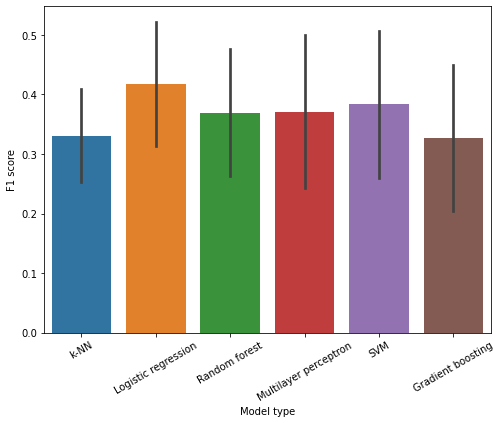

In [22]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="model_name", y="F1", data=f1_df, ci="sd")
labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("F1 score")
#plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

In [23]:
grouped = df_concat.groupby(level=[0,1,2])
grouped

In [24]:
means = grouped.mean()[["F1"]]
means.rename({"F1": "mean"}, axis=1, inplace=True)
se = grouped.std()[["F1"]]
se.rename({"F1": "sd"}, axis=1, inplace=True)

In [25]:
pd.concat([means, se], axis=1)

mean        sd
model_name    data   preprocessing                    
SVM           bert   no_prepro      0.496382  0.035678
                     oversampling   0.470295  0.054315
                     scaling        0.511519  0.048157
                     smote_os       0.502085  0.075596
                     undersampling  0.461042  0.040392
...                                      ...       ...
random_forest seqvec no_prepro      0.442173  0.070993
                     oversampling   0.380040  0.066817
                     scaling        0.410795  0.107967
                     smote_os       0.384633  0.057059
                     undersampling  0.445080  0.051112

[210 rows x 2 columns]

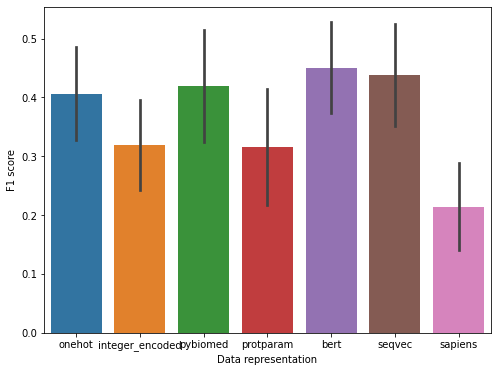

In [27]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="data", y="F1", data=f1_df, ci="sd")
#labels = ["Sapiens", "Integer encoded", "PyBioMed", "ProtParam", "BERT", "SeqVec", "One-hot"]
#ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("F1 score")
#plt.savefig(path.join(DATA_DIR, "images/f1_of_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

# TAP

In [30]:
tap_acc_df = pd.concat(df_list_tap)[["model_name", "data", "preprocessing", "F1", "Acc"]]

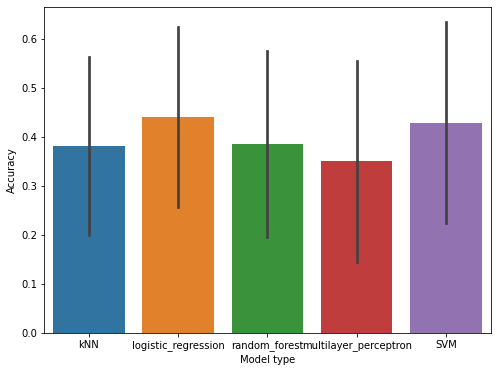

In [32]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="model_name", y="Acc", data=tap_acc_df, ci="sd")
#labels = ["k-NN", "Logistic regression", "Random forest", "Multilayer perceptron", "SVM", "Gradient boosting"]
#ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Model type")
ax.set_ylabel("Accuracy")
#plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd.png"), bbox_inches='tight')
plt.show()

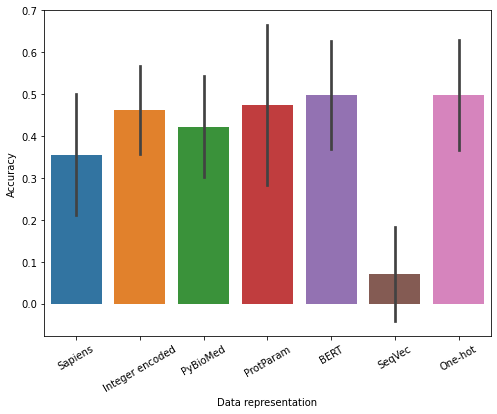

In [33]:
plt.figure(figsize=(8,6))
order = ["sapiens", "integer_encoded", "pybiomed", "protparam", "bert", "seqvec", "onehot"]
ax = sns.barplot(x="data", y="Acc", data=tap_acc_df, ci="sd", order=order)
labels = ["Sapiens", "Integer encoded", "PyBioMed", "ProtParam", "BERT", "SeqVec", "One-hot"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("Data representation")
ax.set_ylabel("Accuracy")
#plt.savefig(path.join(DATA_DIR, "images/acc_on_tap_cross_val_with_sd_by_data.png"), bbox_inches='tight')
plt.show()

## ProteinBERT

In [122]:
df_bert = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.526, 0.636, 0.486, 0.324, 0.492, 0.657, 0.482, 0.535, 0.487, 0.417], # F1
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [1,1,1,1,1,1,1,1,1,1]
})

In [124]:
df_acc = pd.DataFrame({
    "random_seed": [2,13,19,27,38,42,56,63,6,78],
    "metric": [0.580, 0.589, 0.598, 0.560, 0.610, 0.535,0.676, 0.560, 0.515, 0.639], # Accuracy
    "epochs": [26, 39, 45, 46, 23, 43, 42, 35, 34, 17],
    "x": [0,0,0,0,0,0,0,0,0,0]
})
df_bert_adj = pd.concat([df_bert, df_acc])

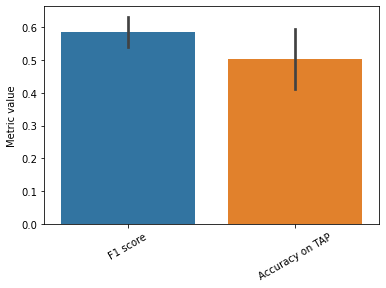

In [130]:
plt.figure(figsize=(6,4))
ax = sns.barplot(x="x", y="metric", data=df_bert_adj, ci="sd")
labels = ["F1 score", "Accuracy on TAP"]
ax.set_xticklabels(labels,rotation = 30)
ax.set_xlabel("")
ax.set_ylabel("Metric value")
plt.savefig(path.join(DATA_DIR, "images/f1_and_acc_protein_bert.png"), bbox_inches='tight')
plt.show()